# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [45]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('data\Employee.csv')   ## import csv file
employee

Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
mean_salary_1 = employee.groupby('Department').agg({'Salary':'mean'})  ## mean salary by department
mean_salary_1

Salary
Department        
HR           45.00
IT           48.75
Sales        55.00

In [6]:
# Method 2
# your answer here
mean_salary_2 = pd.pivot_table(employee, values = 'Salary', index='Department')  ## mean salary by department
mean_salary_2

Salary
Department        
HR           45.00
IT           48.75
Sales        55.00

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
mean_salary_3 = pd.pivot_table(employee, values = 'Salary', index=['Department','Title'])  ## mean salary by department and title
mean_salary_3

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [40]:
# your answer here
mean_salary_4 = pd.pivot_table(employee, values = 'Salary', index=['Title'], columns='Years') ## salary and work experience by title
mean_salary_4

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [14]:
# your answer here
mean_salary_5 = pd.pivot_table(employee, values = ['Salary','Name'], index=['Department','Title'], aggfunc={'Salary': np.mean,'Name': 'count'})
mean_salary_5          ## salary and employees by department and job title

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [17]:
# your answer here
salary_info = pd.pivot_table(employee, values = ['Salary'], index=['Department','Title'], aggfunc={'Salary': ['median', min, max, np.mean, 'std']})
salary_info     ## salary information by department and job title

Salary                             
                        max  mean median   min       std
Department Title                                        
HR         VP          70.0  70.0   70.0  70.0       NaN
           analyst     35.0  32.5   32.5  30.0  3.535534
IT         VP          70.0  70.0   70.0  70.0       NaN
           analyst     35.0  32.5   32.5  30.0  3.535534
           associate   60.0  60.0   60.0  60.0       NaN
Sales      associate   55.0  55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [18]:
# your answer here
salary_info.fillna(0)    ## fill nans

Salary                             
                        max  mean median   min       std
Department Title                                        
HR         VP          70.0  70.0   70.0  70.0  0.000000
           analyst     35.0  32.5   32.5  30.0  3.535534
IT         VP          70.0  70.0   70.0  70.0  0.000000
           analyst     35.0  32.5   32.5  30.0  3.535534
           associate   60.0  60.0   60.0  60.0  0.000000
Sales      associate   55.0  55.0   55.0  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [22]:
# your answer here
money_spend = pd.pivot_table(employee, values = ['Salary','Name'], index=['Department'], aggfunc={'Salary': 'sum','Name': 'count'}).rename(columns={'Name': 'Employees'})
money_spend          ## money spend on salaries by department

Employees  Salary
Department                   
HR                  3     135
IT                  4     195
Sales               2     110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [23]:
# your answer here
mean_salary_10 = pd.pivot_table(employee, values = ['Salary','Years'], index=['Department','Title'])
mean_salary_10    ## salary and work experience by department

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [43]:
# your answer here
mean_salary_withoutmax = pd.pivot_table(employee, values = ['Salary'], index=['Department'], aggfunc={'Salary':lambda x: ((sum(x)-max(x))/len(x-1))})
mean_salary_withoutmax    ## mean salary without the maximum


Salary
Department           
HR          21.666667
IT          31.250000
Sales       27.500000

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [25]:
# your answer here
fitbit = pd.read_csv('data\Fitbit.csv')     ## import data
fitbit.head()

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  08-05-2015            1934    905      0.65       0              1.355   
1  09-05-2015            3631  18925     14.11       4            611.000   
2  10-05-2015            3204  14228     10.57       1            602.000   
3  11-05-2015            2673   6756      5.02       8            749.000   
4  12-05-2015            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  \
0               1680             384                   26                23   
1               2248             454                   35                21   
2               1719             387                   46                25   
3               9620             311                   31                21   
4               7360             407                   65                44   

   LengthOfRestInMinutes  
0                    417  
1                    491  
2                    436  
3                    350  
4                    491

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [26]:
# your answer here
fitbit.dtypes    ## see data types

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [28]:
# your answer here
fitbit.describe()   ## describe numerical data

Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000               8.000000   
50%           663.000000              226.000000              24.000000   
75%           756.500000              290.000000              41.500000   
max           998.000000              472.000000             101.000000   

       Minutes Very Active  Activity Calories  MinutesOfSleep  \
count           367.000000         367.000000      367.000000   
mean             35.722071        2044.147139      290.479564   
std              31.006682        2041.267168      154.752328   
min               0.000000           0.000000        0.000000   
25%              10.500000        1218.500000      224.000000   
50%              29.000000        1553.000000      337.000000   
75%              54.000000        1927.500000      400.500000   
max             153.000000        9830.000000      553.000000   

       MinutesOfBeingAwake  NumberOfAwakings  LengthOfRestInMinutes  
count           367.000000        367.000000             367.000000  
mean             28.008174         16.196185             321.343324  
std              18.541415         10.757622             170.786726  
min               0.000000          0.000000               0.000000  
25%              14.000000          7.000000             248.000000  
50%              29.000000         16.000000             370.000000  
75%              41.500000         24.000000             440.500000  
max              78.000000         45.000000             607.000000

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here
fitbit[['Steps','Minutes Very Active']].corr()   ##correlation of 0.57

Steps  Minutes Very Active
Steps                1.000000             0.571452
Minutes Very Active  0.571452             1.000000

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

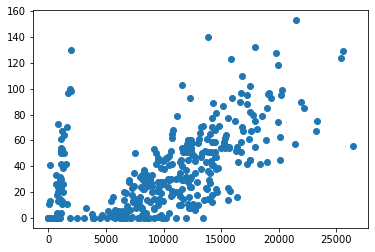

In [32]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])   ## plot

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
## people with more than 5000 steps have a linear relation with minutes very active
## there are a group of people with steps bellow 5000 that present an increased number of steps.
## probably people that practise exercise that doesnt envolve steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [33]:
# your answer here
fitbit[['Steps','Minutes Sedentary']].corr()   ## low correlation of 0.077

Steps  Minutes Sedentary
Steps              1.000000           0.076906
Minutes Sedentary  0.076906           1.000000

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

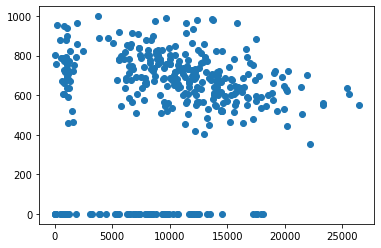

In [34]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])  ## we can divide the data in 3 groups, people with no sedentary minutes, people with
                                                               ## lower number of steps and the third group with some linear relationship between both variables

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [35]:
# your answer here
fitbit[['Steps','MinutesOfSleep']].corr()   ## low correlation (0.13)

Steps  MinutesOfSleep
Steps           1.000000        0.130986
MinutesOfSleep  0.130986        1.000000

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

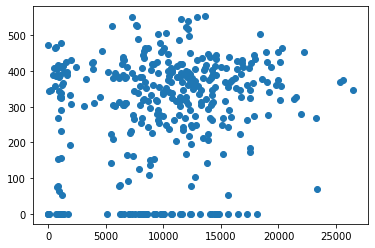

In [36]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])  ## no relationship found

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [37]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit ## higher correlation are between steps and minutes very active (0.571) and between floors ans minutes very active (0.399)

Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [39]:
# your answer here
fitbit_sorted = cor_fit.sort_values(by='Steps', ascending=False)
fitbit_sorted   ## minutes very active

Calorie burned     Steps    Floors  Minutes Sedentary  \
Steps                      0.255305  1.000000  0.306511           0.076906   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
Floors                     0.130757  0.306511  1.000000           0.057812   
Calorie burned             1.000000  0.255305  0.130757           0.125353   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   

                     Minutes Very Active  MinutesOfSleep  
Steps                           0.571452        0.130986  
Minutes Very Active             1.000000        0.108018  
Floors                          0.399503        0.069464  
Calorie burned                  0.197881        0.011485  
MinutesOfSleep                  0.108018        1.000000  
Minutes Sedentary               0.105963        0.204242

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [44]:
# your answer here
time_grades = pd.read_csv('data\Time_Grades.csv')
time_grades.head()

Name  Study time  Grade
0    Jose           4      4
1   Maria           9      7
2   David           8      9
3   Sonia          10      7
4  Samuel          20      9

#### Show visually the frequency distribution of the time_grades dataset.

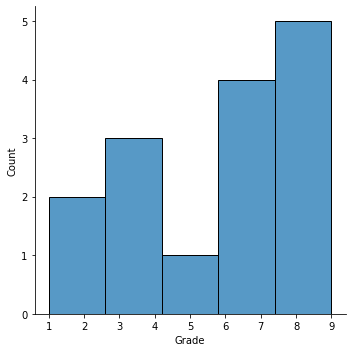

In [46]:
# your answer here
sns.displot(time_grades, x="Grade")  ## see grades distribution

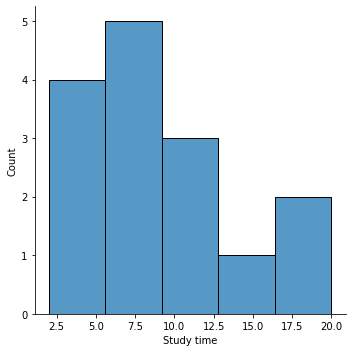

In [47]:
sns.displot(time_grades, x="Study time")  ## see study time distribution

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [49]:
# your answer here
time_grades.corr(method='pearson')  ## correlation of 0.798

Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000

In [50]:
time_grades.corr(method='spearman')  ## correlation of 0.819

Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

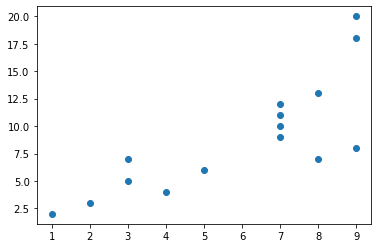

In [48]:
# your answer here
plt.scatter(x=time_grades['Grade'], y=time_grades['Study time'])   ## plot

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

## pearson correlation assumes that the data is normally distributed. 
## Spearman correlation does not assume the normally distributed data

## In this case data is not normally distributed, so spearman correlation is higher